# Setup

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [34]:
# importing washington post database
df = pd.read_csv(
    "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv",
    parse_dates=["date"],
    index_col="date",
    )

In [35]:
df.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
date,,,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7802 entries, 2015-01-02 to 2022-10-04
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7802 non-null   int64  
 1   name                     7377 non-null   object 
 2   manner_of_death          7802 non-null   object 
 3   armed                    7593 non-null   object 
 4   age                      7316 non-null   float64
 5   gender                   7781 non-null   object 
 6   race                     6293 non-null   object 
 7   city                     7802 non-null   object 
 8   state                    7802 non-null   object 
 9   signs_of_mental_illness  7802 non-null   bool   
 10  threat_level             7802 non-null   object 
 11  flee                     6903 non-null   object 
 12  body_camera              7802 non-null   bool   
 13  longitude                6963 non-null   float64
 14  latitu

In [37]:
df.index.dtype # confirming that I loaded the index as a date

dtype('<M8[ns]')

In [38]:
unarmed = df[df.armed=="unarmed"]

In [39]:
unarmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2015-01-03 to 2022-09-24
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       458 non-null    int64  
 1   name                     454 non-null    object 
 2   manner_of_death          458 non-null    object 
 3   armed                    458 non-null    object 
 4   age                      452 non-null    float64
 5   gender                   458 non-null    object 
 6   race                     428 non-null    object 
 7   city                     458 non-null    object 
 8   state                    458 non-null    object 
 9   signs_of_mental_illness  458 non-null    bool   
 10  threat_level             458 non-null    object 
 11  flee                     426 non-null    object 
 12  body_camera              458 non-null    bool   
 13  longitude                422 non-null    float64
 14  latitud

# Plotting

## Df plot

In [186]:
killings_monthly = unarmed.groupby(
    [unarmed.index.year, unarmed.index.month]
    ).size(
    ).rename("num_killed")#.to_frame("num_killed")

killings_yearly = unarmed.groupby(
    [unarmed.index.year]
    ).size(
    ).rename("num_killed")

In [187]:
killings_monthly.index.set_names(["year", "month"], inplace=True)
killings_monthly

year  month
2015  1         5
      2        14
      3        11
      4         9
      5         4
               ..
2022  5         2
      6         4
      7         2
      8         1
      9         3
Name: num_killed, Length: 91, dtype: int64

In [82]:
# testing creating x ticks
xt = (
    killings_monthly.index.get_level_values(level=1).map(str) + 
    "/" + 
    (killings_monthly.index.get_level_values(level=0)).map(str)
).tolist()
# xt


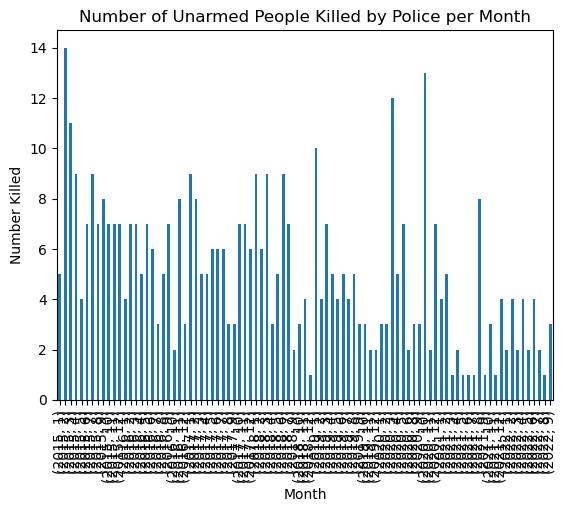

In [84]:
# unarmed.plot("date")
# unarmed.groupby(unarmed["date"].dt.month).size().plot(kind="bar")
# bydate = unarmed.groupby([unarmed["date"].dt.year, unarmed["date"].dt.month]).size()

killings_monthly.plot(
        kind="bar", 
        title="Number of Unarmed People Killed by Police per Month", 
        xlabel="Month", 
        ylabel="Number Killed", 
        # xticks=xt
        );


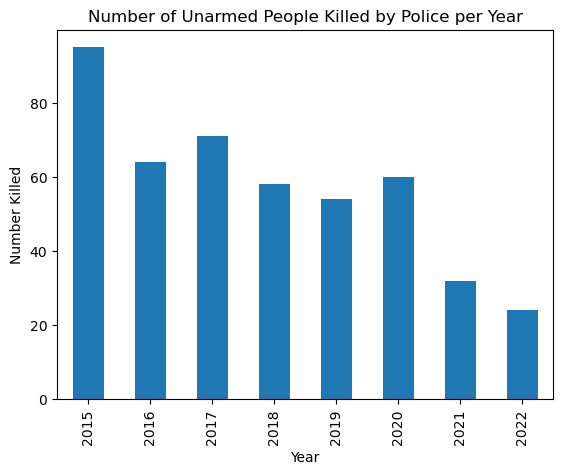

In [85]:
killings_yearly.plot(
        kind="bar", 
        title="Number of Unarmed People Killed by Police per Year", 
        xlabel="Year", 
        ylabel="Number Killed", 
        # xticks=xt
        );

## matplotlib

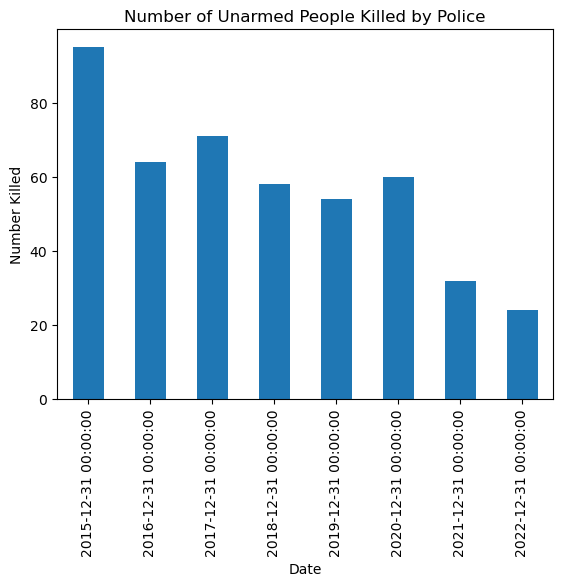

In [131]:
#trying printing using matplotlib's date stuff
unarmed_monthly = unarmed.resample("Y").size()
unarmed_monthly.plot(
        kind="bar", 
        title="Number of Unarmed People Killed by Police", 
        xlabel="Date", 
        ylabel="Number Killed", 
);


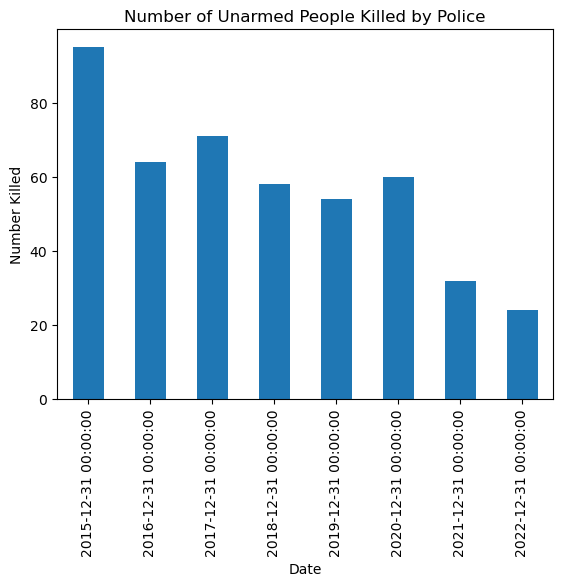

In [93]:
#trying printing using matplotlib's date stuff
unarmed_monthly = unarmed.resample("Y").size()
unarmed_monthly.plot(
        kind="bar", 
        title="Number of Unarmed People Killed by Police", 
        xlabel="Date", 
        ylabel="Number Killed", 
);


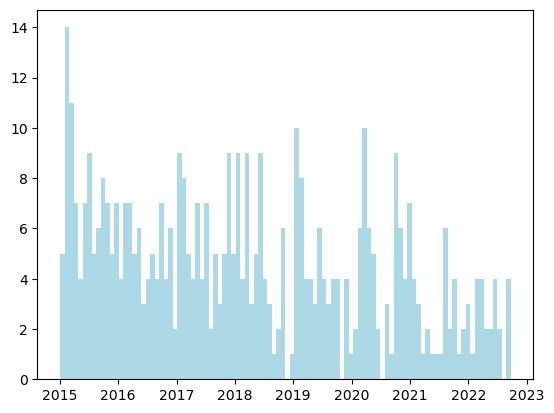

In [128]:
# with hist and DateFormatter

# f, ax = plt.subplots()
# ax.scatter(unarmed_monthly)
# unarmed.hist()

fig, ax = plt.subplots(1,1)
ax.hist(unarmed.index, bins=100, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()


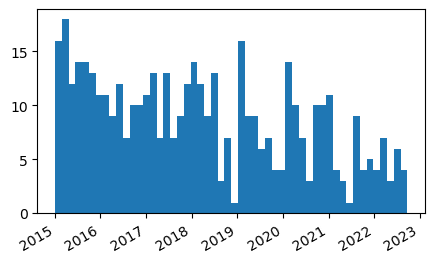

In [126]:
# with autofmt_xdate

fig, ax = plt.subplots(figsize=(5,3))
n, bins, patches = ax.hist(unarmed.index, bins=52)#, range=(start_date, end_date))
fig.autofmt_xdate()
plt.show()


In [94]:
import matplotlib.dates as mdates
# import matplotlib.pyplot as plt
  

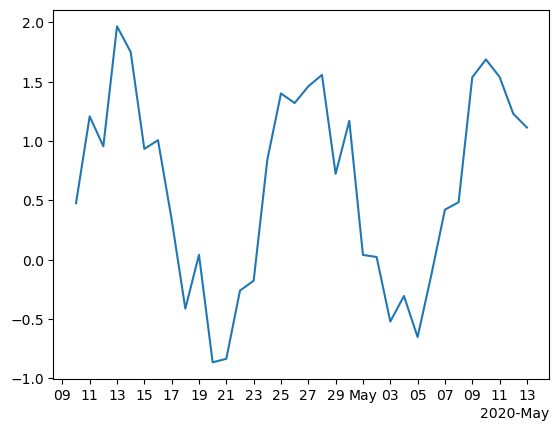

In [182]:

# dummy date
dummy_date = np.arange("2020-04-10", 
                       "2020-05-14",
                       dtype ="datetime64")
  
random_x = np.random.rand(len(dummy_date)) + list(map(np.sin, np.linspace(0, 15, len(dummy_date))))
   
figure, axes = plt.subplots()
  
axes.plot(dummy_date, random_x)
axes.xaxis.set(
    major_locator = mdates.AutoDateLocator(minticks = 1,
                                           maxticks = 5),
)

locator = mdates.AutoDateLocator(minticks = 15,
                                 maxticks = 20)
formatter = mdates.ConciseDateFormatter(locator)
  
axes.xaxis.set_major_locator(locator)
axes.xaxis.set_major_formatter(formatter)


## Altair

In [132]:
import altair as alt

In [143]:
altdf = unarmed.reset_index()
altdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     458 non-null    datetime64[ns]
 1   id                       458 non-null    int64         
 2   name                     454 non-null    object        
 3   manner_of_death          458 non-null    object        
 4   armed                    458 non-null    object        
 5   age                      452 non-null    float64       
 6   gender                   458 non-null    object        
 7   race                     428 non-null    object        
 8   city                     458 non-null    object        
 9   state                    458 non-null    object        
 10  signs_of_mental_illness  458 non-null    bool          
 11  threat_level             458 non-null    object        
 12  flee                     426 non-nul

In [222]:
alt.Chart(altdf).mark_bar().encode(
    alt.X("year(date):T"),
    y='count()',
).interactive() # can remove it to make it not interactive


alt.Chart(...)

In [ ]:
# next challenge - make it change the binning when you zoom in 

In [192]:
# confirming that these numbers look right
altdf.groupby([altdf.date.dt.year]).size()

date
2015    95
2016    64
2017    71
2018    58
2019    54
2020    60
2021    32
2022    24
dtype: int64

In [213]:
# now can I make a histogram that lets me zoom in? 

source = altdf

brush = alt.selection_interval(encodings=['x'])

base = alt.Chart(source).mark_bar().encode(
    y='count():Q'
).properties(
    width=600,
    height=100
)

alt.vconcat(
  base.encode(
    alt.X('date(date):Q',
      bin=alt.Bin(maxbins=30, extent=brush),
      scale=alt.Scale(domain=brush)
    )
  ),
  base.encode(
    alt.X('date(date):Q', bin=alt.Bin(maxbins=30)),
  ).add_selection(brush)
)


alt.VConcatChart(...)

In [214]:
from vega_datasets import data

In [216]:
source = data.flights_5k.url

brush = alt.selection_interval(encodings=['x'])

base = alt.Chart(source).transform_calculate(
    time="hours(datum.date)"
).mark_bar().encode(
    y='count():Q'
).properties(
    width=600,
    height=100
)

alt.vconcat(
  base.encode(
    alt.X('time:Q',
      bin=alt.Bin(maxbins=30, extent=brush),
      scale=alt.Scale(domain=brush)
    )
  ),
  base.encode(
    alt.X('time:Q', bin=alt.Bin(maxbins=30)),
  ).add_selection(brush)
)


alt.VConcatChart(...)

### testing altair

In [150]:
import random

In [169]:
x = []
for r in range (100): x.append(random.randrange(10))
dftest = pd.DataFrame({"num": x})
alt.Chart(dftest).mark_bar().encode(
    alt.X("num:Q", bin=True),
    y='count()',
)

alt.Chart(...)